In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Employees GRAD.csv')
df

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,1/3/2012,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,1/4/2012,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,1/4/2012,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,1/5/2012,No,10,10,10,0
4,1A7C-19DB,Randi,Oswick,Female,39,Some Travel,Technology,42,CA,White,...,Single,539998,0,Yes,11/22/2020,Yes,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,12/26/2022,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,12/30/2022,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,12/30/2022,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,12/30/2022,No,0,0,0,0


**EXPLORING DATA**

In [ ]:
df.info()
# hiredate object to date
# education object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   object
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   object
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [ ]:
df.shape

(1470, 23)

**CHECK DATA TYPES**

In [ ]:
df.dtypes
#hire_date to date
# educatio to object

,0
EmployeeID,object
FirstName,object
LastName,object
Gender,object
Age,int64
BusinessTravel,object
Department,object
DistanceFromHome (KM),object
State,object
Ethnicity,object


**CHECK DUPLICATES**

In [ ]:
df.duplicated().sum()
# no duplicated

np.int64(0)

**CHECK NULLS**

In [ ]:
df.isnull().sum()
# no null values

,0
EmployeeID,0
FirstName,0
LastName,0
Gender,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome (KM),0
State,0
Ethnicity,0


**CHECK OUTLIERS IN SALARY**

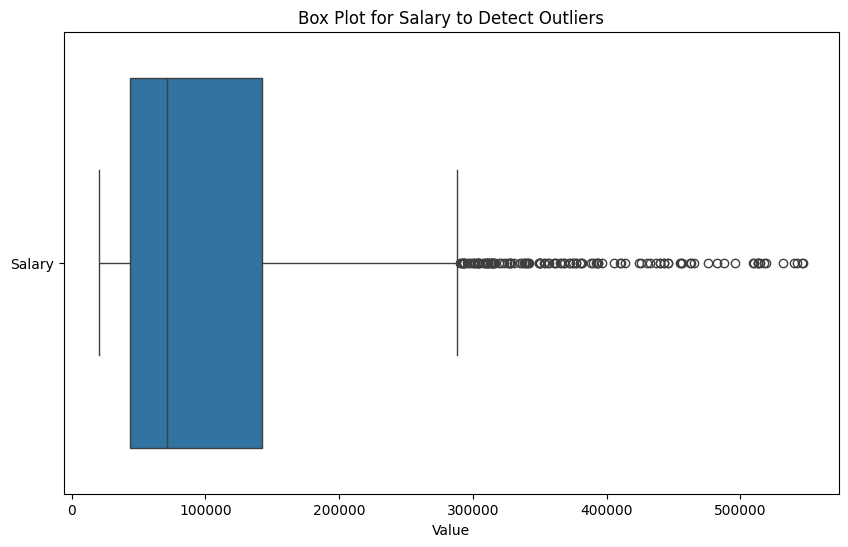

124

In [ ]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = {}
outliers['Salary'] = df[(df['Salary'] < Q1 - 1.5 * IQR) | (df['Salary'] > Q3 + 1.5 * IQR)]['Salary']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Salary']], orient="h")
plt.title("Box Plot for Salary to Detect Outliers")
plt.xlabel("Value")
plt.show()
pd.set_option('display.max_rows', None)

count_outliers = len(outliers['Salary'])
count_outliers


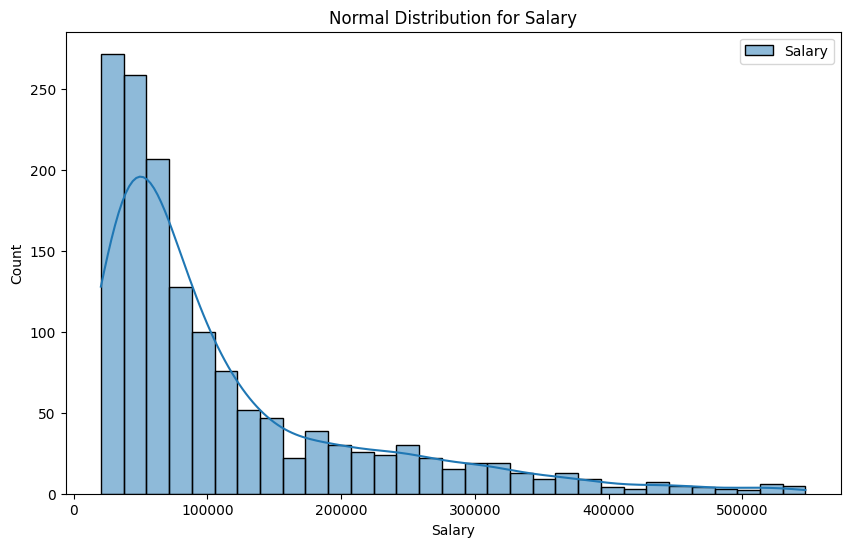

In [ ]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = {}
outliers['Salary'] = df[(df['Salary'] < Q1 - 1.5 * IQR) | (df['Salary'] > Q3 + 1.5 * IQR)]['Salary']

plt.figure(figsize=(10, 6))
sns.histplot(data=df[['Salary']],kde=True)
plt.title("Normal Distribution for Salary")
plt.xlabel("Salary")
plt.show()

**PREPROCESSING**

In [ ]:
df['Education'] = df['Education'].astype('object')

In [ ]:
df['FullName'] = df['FirstName'] + ' ' + df['LastName']

In [ ]:
df.dtypes

,0
EmployeeID,object
FirstName,object
LastName,object
Gender,object
Age,int64
BusinessTravel,object
Department,object
DistanceFromHome (KM),object
State,object
Ethnicity,object


In [ ]:
df.describe()

,Age,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


**DROP IRRELVANT**

In [ ]:
df.drop(columns={'EmployeeID','FirstName','LastName','HireDate'},axis=1,inplace=True)
#hire_date----> we have column years at company

**FILL SHORTUCTS**

In [ ]:
# we have five levels educatio from 1 to 5 and i make classification to make it easy and clear in dashboard
def classify_education(level):
    if level == 1:
        return "Below High School"
    elif level == 2:
        return "High School"
    elif level == 3:
        return "Some College"
    elif level == 4:
        return "Bachelor's"
    elif level == 5:
        return "Master's"

df['Education'] = df['Education'].apply(classify_education)


In [ ]:
df['Education'].value_counts()

,count
Education,
Some College,572
Bachelor's,398
High School,282
Below High School,170
Master's,48


In [ ]:
# we have distance from gome between range 1 to 45 km
def classify_distance(km):
    if km < 5:
        return "Very Close"
    elif km < 15:
        return "Close"
    elif km < 30:
        return "Far"
    elif km <= 45:
        return "Very Far"

df['DistanceFromHome (KM)'] = df['DistanceFromHome (KM)'].apply(classify_distance)

In [ ]:
df['DistanceFromHome (KM)'].value_counts()

,count
DistanceFromHome (KM),
Far,519
Very Far,490
Close,321
Very Close,140


In [ ]:
# make it to be clear for un amercian peoble ()
df['State'] = df['State'].replace('NY', 'New York')
df['State'] = df['State'].replace('CA', 'California')
df['State'] = df['State'].replace('IL', 'Illinois')

In [ ]:
df['State'].value_counts()

,count
State,
California,875
New York,419
Illinois,176


<ipython-input-71-d4f63b74d24e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=median_salary, x='Education', y='Salary', ci=None)


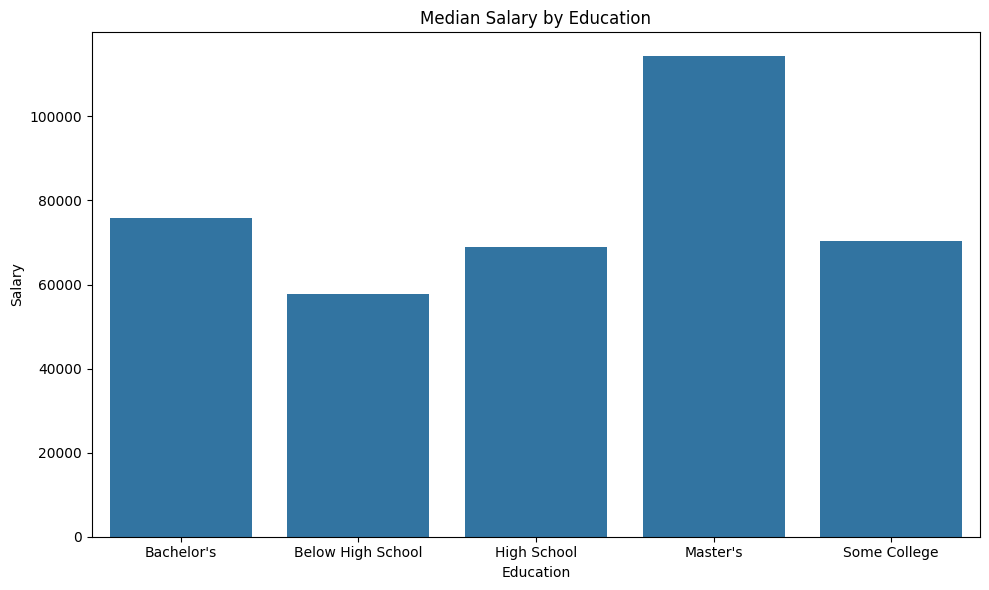

In [ ]:
#to ensure classfications in Educatio
median_salary = df.groupby('Education')['Salary'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=median_salary, x='Education', y='Salary', ci=None)
plt.title("Median Salary by Education")
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('/content/Employees GRAD.csv',index = False)